In [20]:
#law of large numbers which states that the ratio of something gets closer to its probability as you increase the number 

In [60]:
#libraries


from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%matplotlib inline

In [22]:
np.random.rand(10 , 10)

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
        0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
        0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041],
       [0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
        0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249],
       [0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
        0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446],
       [0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
        0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033],
       [0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
        0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694],
       [0.77224477, 0.19871568, 0.0055221

In [23]:
yeah = (np.random.rand(10 , 10)<0.51).astype(np.int32)
yeah


array([[1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0]], dtype=int32)

In [24]:
np.cumsum(yeah)

array([ 1,  1,  2,  3,  3,  4,  5,  5,  6,  7,  8,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 11, 12, 13, 14, 14, 14, 15, 15, 16, 17, 18, 19,
       19, 20, 20, 20, 21, 21, 21, 22, 23, 24, 25, 26, 26, 27, 28, 29, 29,
       30, 31, 32, 32, 33, 33, 33, 34, 34, 35, 35, 35, 35, 36, 36, 37, 38,
       39, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 45, 46, 46, 46, 47,
       47, 47, 47, 47, 48, 49, 49, 49, 49, 50, 51, 51, 51, 51, 51])

In [25]:
np.cumsum(yeah)/np.arange(1 , 101)

array([1.        , 0.5       , 0.66666667, 0.75      , 0.6       ,
       0.66666667, 0.71428571, 0.625     , 0.66666667, 0.7       ,
       0.72727273, 0.75      , 0.69230769, 0.64285714, 0.6       ,
       0.5625    , 0.52941176, 0.55555556, 0.52631579, 0.5       ,
       0.47619048, 0.45454545, 0.47826087, 0.5       , 0.52      ,
       0.53846154, 0.51851852, 0.5       , 0.51724138, 0.5       ,
       0.51612903, 0.53125   , 0.54545455, 0.55882353, 0.54285714,
       0.55555556, 0.54054054, 0.52631579, 0.53846154, 0.525     ,
       0.51219512, 0.52380952, 0.53488372, 0.54545455, 0.55555556,
       0.56521739, 0.55319149, 0.5625    , 0.57142857, 0.58      ,
       0.56862745, 0.57692308, 0.58490566, 0.59259259, 0.58181818,
       0.58928571, 0.57894737, 0.56896552, 0.57627119, 0.56666667,
       0.57377049, 0.56451613, 0.55555556, 0.546875  , 0.55384615,
       0.54545455, 0.55223881, 0.55882353, 0.56521739, 0.55714286,
       0.54929577, 0.55555556, 0.54794521, 0.55405405, 0.54666

In [26]:
np.cumsum(yeah)/np.arange(1,101).reshape(-1 , 1)

array([[1.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        5.10000000e+01, 5.10000000e+01, 5.10000000e+01],
       [5.00000000e-01, 5.00000000e-01, 1.00000000e+00, ...,
        2.55000000e+01, 2.55000000e+01, 2.55000000e+01],
       [3.33333333e-01, 3.33333333e-01, 6.66666667e-01, ...,
        1.70000000e+01, 1.70000000e+01, 1.70000000e+01],
       ...,
       [1.02040816e-02, 1.02040816e-02, 2.04081633e-02, ...,
        5.20408163e-01, 5.20408163e-01, 5.20408163e-01],
       [1.01010101e-02, 1.01010101e-02, 2.02020202e-02, ...,
        5.15151515e-01, 5.15151515e-01, 5.15151515e-01],
       [1.00000000e-02, 1.00000000e-02, 2.00000000e-02, ...,
        5.10000000e-01, 5.10000000e-01, 5.10000000e-01]], shape=(100, 100))

In [27]:
# basically now we gonna plot the head ratio to show the law of large number 

In [28]:
probaility_of_head = 0.51
coin_tosses  = (np.random.rand(10000 , 10) < probaility_of_head).astype(np.int32)

In [29]:
#head ration form the cumulative head

cumulative_head = np.cumsum(coin_tosses , axis=0)/np.arange(1 , 10001).reshape(-1 , 1)

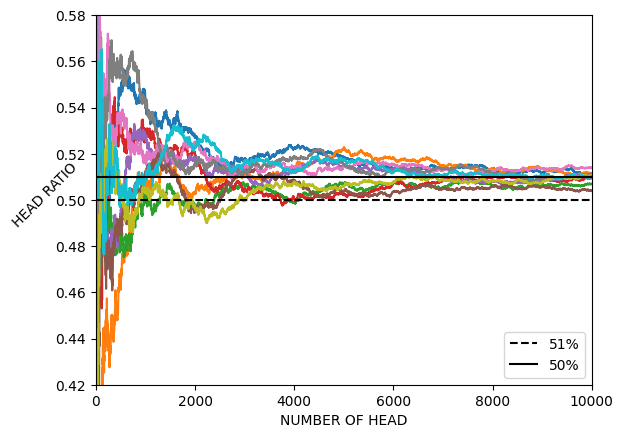

In [30]:
plt.plot(cumulative_head)
plt.axis([0 , 10000 , 0.42 , 0.58] )
plt.plot([0 , 10000] , [0.50 , 0.50] , "k--" , label="51%")
plt.plot([0, 10000] , [0.51 , 0.51] , "k-" , label="50%")
plt.legend(loc="lower right")
plt.xlabel("NUMBER OF HEAD" , fontsize = 10)
plt.ylabel("HEAD RATIO" , fontsize=10 , rotation=45)
plt.show()

In [31]:
x , y = make_moons(n_samples = 500 , noise=0.30 , random_state=42)
x_train , x_test , y_train , y_test = train_test_split(x  , y , random_state=42)

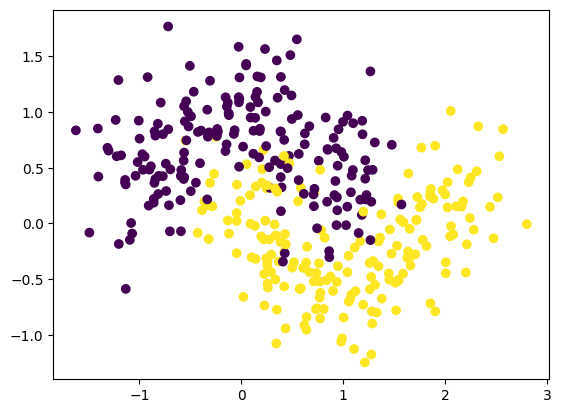

In [32]:
plt.scatter(x_train[: , 0] , x_train[: , 1] , c=y_train)
plt.show()

#dear make moons 

In [34]:
#models

log_clf = LogisticRegression()
random_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
  estimators= [("log clf" , log_clf),  ("random forsest" , random_clf),    ("svm clf" , svm_clf)],
    voting='hard')
       

voting_clf.fit(x_train , y_train)

,estimators,"[('log clf', ...), ('random forsest', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [36]:
#lets check each calssifier indv accuracy

for clf in (log_clf ,  random_clf , svm_clf , voting_clf):
    clf.fit(x_train , y_train)
    y_pred = clf.predict(x_test)
    print(f"{clf.__class__.__name__}  {accuracy_score(y_test , y_pred)}" )

LogisticRegression  0.864
RandomForestClassifier  0.896
SVC  0.896
VotingClassifier  0.904


In [93]:
def plot_(model, x , y):
    x1 = np.linspace(-1.5 , 2 , 100)
    x2 = np.linspace(-1 , 1.5 , 100)
    x1_grid , x2_grid = np.meshgrid(x1 , x2)
    x_final = np.c_[x1_grid.ravel() , x2_grid.ravel()]
    print(x1_grid.shape)
    
    y_pred = model.predict(x_final).reshape(x1_grid.shape)
    plt.scatter(x[: , 0] , x[: , 1] , c=y , cmap="coolwarm")
    plt.contourf(x1_grid , x2_grid , y_pred ,  alpha = 0.3 , cmap="winter")
    plt.axis([-1.5, 2 , -1 , 1.5])
    


(100, 100)


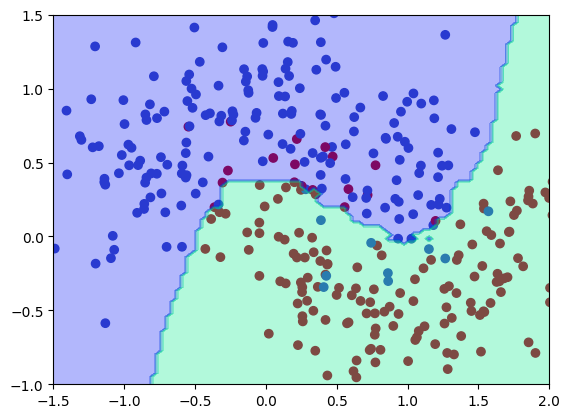

In [94]:
    
plot_(voting_clf , x_train , y_train)

(125, 125)


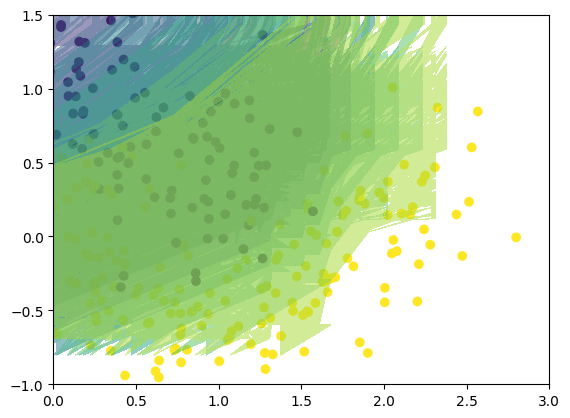

In [55]:
def plot(model, x , y , x_final , y_final):
    
    x1 = x_final[: , 0]
    x2 = x_final[: , 1]
    x1_grid , x2_grid = np.meshgrid(x1 , x2)
    x_final = np.c_[x1_grid.ravel() , x2_grid.ravel()]
    print(x1_grid.shape)
    
    y_pred = model.predict(x_final).reshape(x1_grid.shape)
    plt.scatter(x[: , 0] , x[: , 1] , c=y)
    plt.contourf(x1_grid , x2_grid , y_pred , alpha = 0.3)
    plt.axis([0 , 3 , -1 , 1.5])
    plt.show()

plot(voting_clf , x_train , y_train , x_test , y_test)

In [56]:
log_clf = LogisticRegression()
random_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
  estimators= [("log clf" , log_clf),  ("random forsest" , random_clf),    ("svm clf" , svm_clf)],
    voting='soft')
       

voting_clf.fit(x_train , y_train)

,estimators,"[('log clf', ...), ('random forsest', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [57]:

for clf in (log_clf ,  random_clf , svm_clf , voting_clf):
    clf.fit(x_train , y_train)
    y_pred = clf.predict(x_test)
    print(f"{clf.__class__.__name__}  {accuracy_score(y_test , y_pred)}" )

LogisticRegression  0.864
RandomForestClassifier  0.904
SVC  0.896
VotingClassifier  0.912


<b><H1><u>BAGGING AND PASTING

basically training same algo for every predictor but train them on different random subsets of the training data

In [61]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier() , n_estimators=500 ,
    max_samples= 100 , bootstrap=True , n_jobs=-1)

bag_clf.fit(x_train , y_train)
y_pred = bag_clf.predict(x_test)
print(f"accuracy : {accuracy_score(y_test , y_pred)}")

accuracy : 0.904


In [64]:
tree = DecisionTreeClassifier()
tree.fit(x_train , y_train)

y_pred = tree.predict(x_test)
print(f"acccuracy : {accuracy_score(y_test , y_pred)}")

acccuracy : 0.832


(100, 100)


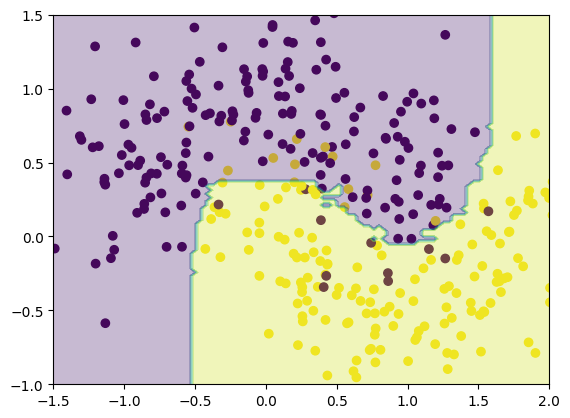

In [68]:
plot_(bag_clf , x_train , y_train)

(100, 100)


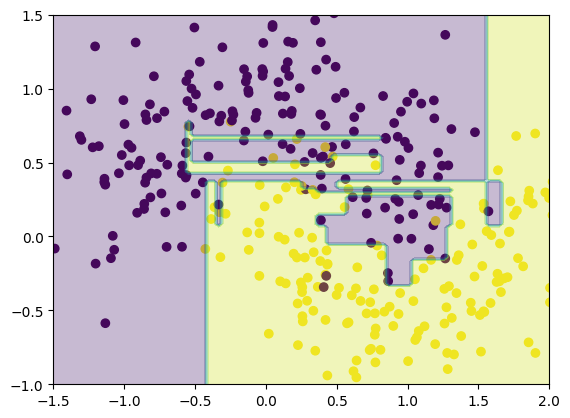

In [69]:
plot_(tree , x_train , y_train)

(100, 100)
(100, 100)


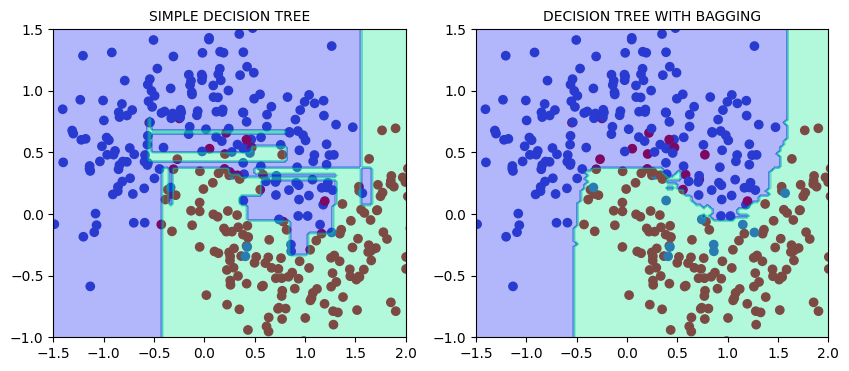

In [95]:
fig , axes = plt.subplots( 1 , 2 , figsize=(10,4))
plt.sca(axes[0])
plot_(tree , x_train , y_train)
plt.title("SIMPLE DECISION TREE" , fontsize=10)
plt.sca(axes[1])
plt.title("DECISION TREE WITH BAGGING" , fontsize=10)
plot_(bag_clf , x_train , y_train)
plt.show()